# **Data reading and initilizing**

Its has two datasets as given below, and we execute only one of them at a time



In [97]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

### 1.Dataset- Play or Not

Its the dataset having features `outlook` `temp` `humidity` `wind`  and target  `play`

In [110]:
df = pd.read_csv("https://raw.githubusercontent.com/Ajith-Kumar-G/Clg-Labs/main/VI%20sem/ML_LAB/LAB%205/Datasets/data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       14 non-null     object
 1   outlook   14 non-null     object
 2   temp      14 non-null     object
 3   humidity  14 non-null     object
 4   wind      14 non-null     object
 5   play      14 non-null     object
dtypes: object(6)
memory usage: 800.0+ bytes


In [111]:
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [100]:
X = df.iloc[:,1:5].values
y = df.iloc[:,5].values
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.5, random_state=0)

### 2.Dataset- Iris Type
Its the dataset having features `SepalLengthCm`	`SepalWidthCm` `PetalLengthCm`	`PetalWidthCm`   and target `Species`

In [114]:
df = pd.read_csv("https://raw.githubusercontent.com/Ajith-Kumar-G/Clg-Labs/main/VI%20sem/ML_LAB/LAB%205/Datasets/Iris.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [115]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [122]:
X = df.iloc[:,1:5].values
y = df.iloc[:,5].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# **Preprocessing and Training Model**


### Preprocessing by encoding data

In [117]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

### Model defining and training pipeline

In [118]:
# Creating pipeline
from sklearn.pipeline import Pipeline
model = MultinomialNB()
pipe = Pipeline([('encoding', enc), ('model', model)])

In [123]:
# Fitting the pipe
pipe.fit(X_train, y_train)

Pipeline(steps=[('encoding', OneHotEncoder(handle_unknown='ignore')),
                ('model', MultinomialNB())])

In [124]:
# Predicting the Entire y
y_pred = pipe.predict(X)
print("Number of mislabeled points out of a total %d points : %d" % (X.shape[0], (y != y_pred).sum()))
print("Accuracy =", accuracy_score(y,y_pred))

Number of mislabeled points out of a total 150 points : 6
Accuracy = 0.96


# **Visulaizing Cofusion Matrix**

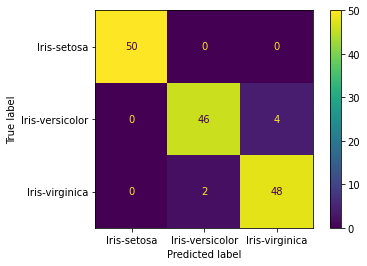

In [126]:
# plotting a confusion matrix for the result
cm = confusion_matrix(y, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()